# BUSINESS CONTEXT:
- This case requires trainees to develop a customer segmentation to define marketing strategy. The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables. Expectations from the Trainees:

## EXPECTATIONS FROM THE TRAINEES:
- Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:
- Monthly average purchase and cash advance amount
- Purchases by type (one-off, installments)
- Average amount per purchase and cash advance transaction,
- Limit usage (balance to credit limit ratio),
- Payments to minimum payments ratio etc.
- Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
- Identification of the relationships/ affinities between services.
- Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm to reveal the behavioural segments of credit card holders
- Identify cluster characterisitics of the cluster using detailed profiling.
- Provide the strategic insights and implementation of strategies for given set of cluster characteristics

## DATA DICTIONARY:
- CUST_ID: Credit card holder ID
- BALANCE: Monthly average balance (based on daily balance averages)
- BALANCE_FREQUENCY: Ratio of last 12 months with balance
- PURCHASES: Total purchase amount spent during last 12 months
- ONEOFF_PURCHASES: Total amount of one-off purchases
- INSTALLMENTS_PURCHASES: Total amount of installment purchases
- CASH_ADVANCE: Total cash-advance amount
- PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase)
- ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases
- PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases
- CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency
- AVERAGE_PURCHASE_TRX: Average amount per purchase transaction
- CASH_ADVANCE_TRX: Average amount per cash-advance transaction
- PURCHASES_TRX: Average amount per purchase transaction
- CREDIT_LIMIT: Credit limit
- PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period
- MINIMUM_PAYMENTS: Total minimum payments due in the period.
- PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance
- TENURE: Number of months as a customer

In [7]:
%%html
<style>
body {
    font-family: "Verdana", cursive, sans-serif;
}
</style> 

%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

# Importing Libraries and Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
credit = pd.read_csv('CC_GENERAL.csv')

In [4]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Distribution of Data

C:\anaconda3old\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\anaconda3old\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


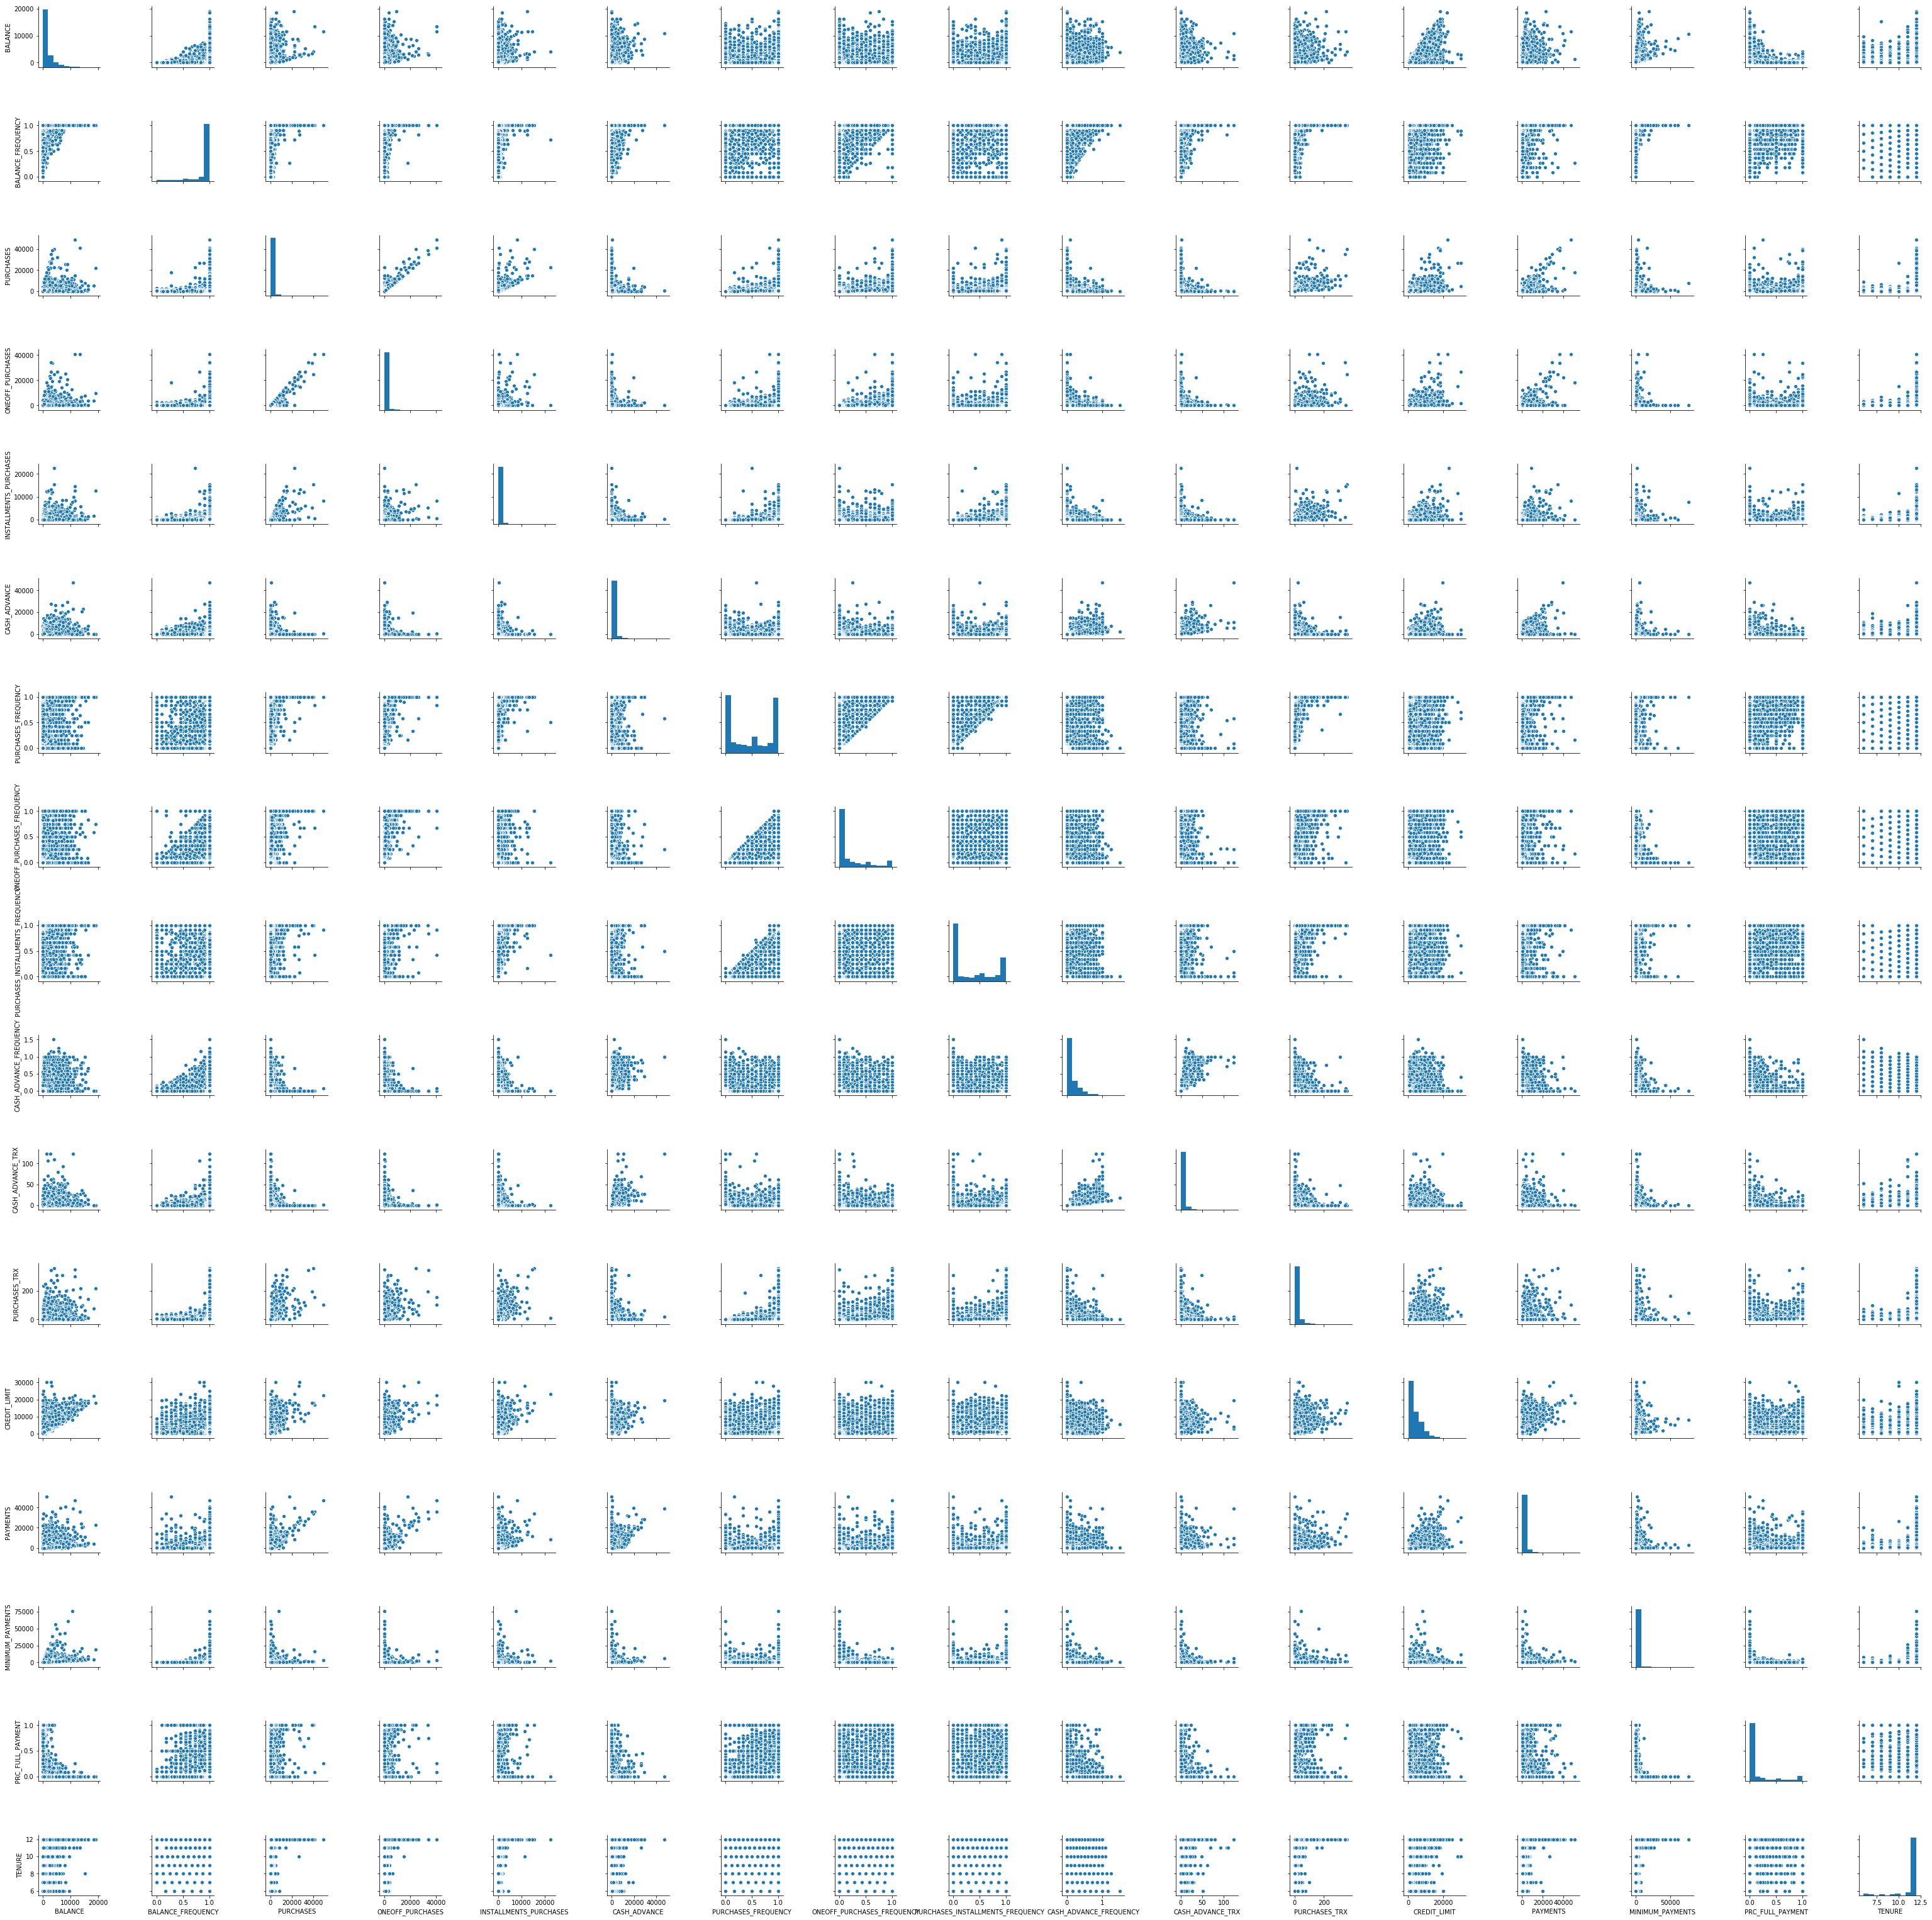

In [9]:
sns.pairplot(credit)

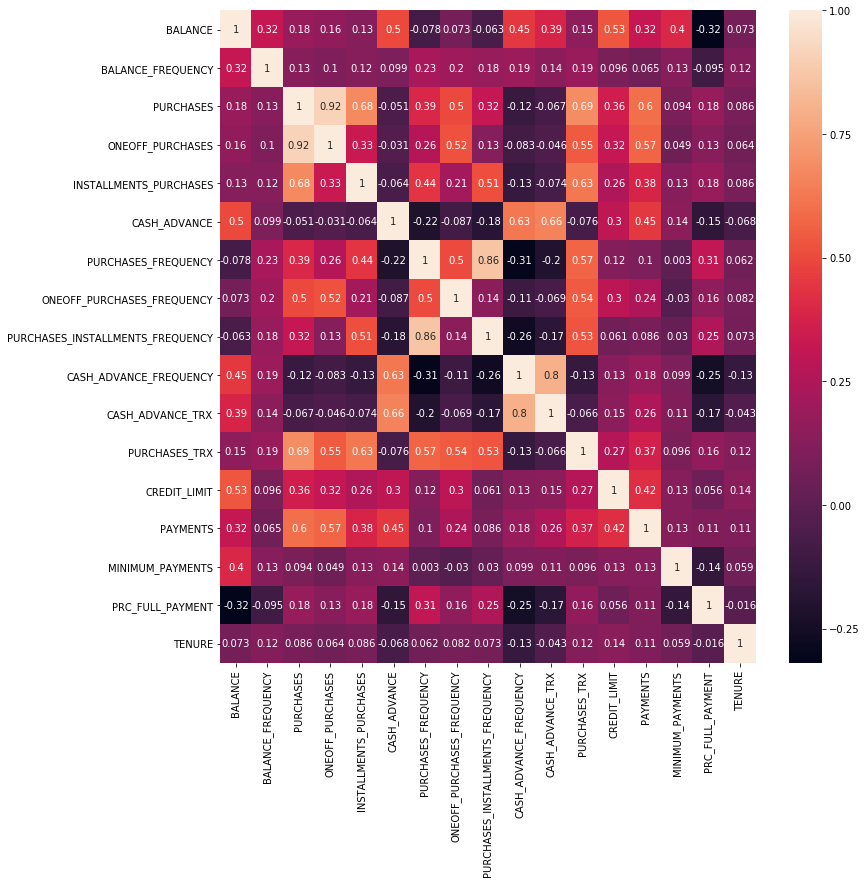

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(credit.corr(), annot=True)

- We can see that some features have high correlation.

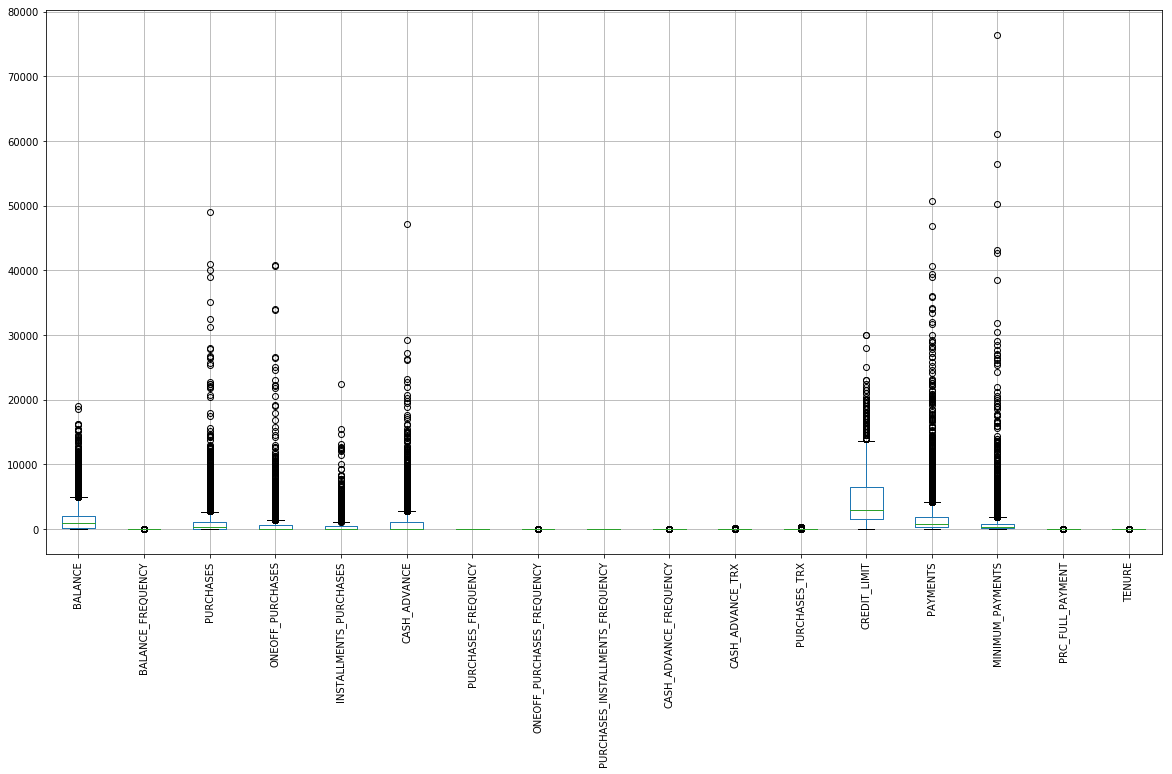

In [19]:
# Determining outliers by boxplot
credit.boxplot(rot=90, figsize=(20,10))

## Missing Value and Outlier Treatment

In [13]:
# Checking missing values
credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
credit.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [20]:
num_features = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']
cat_features = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
                'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','PRC_FULL_PAYMENT','TENURE']

#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

credit_num=credit[num_features].apply(lambda x: outlier_capping(x))

In [25]:
# Removing missing values
mean_value = credit_num['MINIMUM_PAYMENTS'].mean()
credit_num['MINIMUM_PAYMENTS'].fillna(mean_value, inplace=True)
median_value = credit_num['CREDIT_LIMIT'].median()
credit_num['CREDIT_LIMIT'].fillna(median_value, inplace=True)

In [26]:
credit_num.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,40.900749,95.40,0.00,95.4,0.000000,1000.0,201.802084,139.509787
1,3202.467416,0.00,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217
2,2495.148862,773.17,773.17,0.0,0.000000,7500.0,622.066742,627.284787
3,1666.670542,1499.00,1499.00,0.0,205.788017,7500.0,0.000000,767.303879
4,817.714335,16.00,16.00,0.0,0.000000,1200.0,678.334763,244.791237


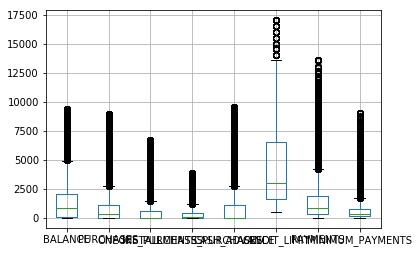

In [28]:
credit_num.boxplot()

## Feature Engineering

In [ ]:
# To prepare data 
data = pd.concat([credit_num,credit[cat_features]],axis=1)

In [47]:
data['Monthly_avg_purchase'] = data.PURCHASES / 12
data['Monthly_avg_cashAdvance'] = data.CASH_ADVANCE /12
data['Limit_usage'] = data.BALANCE / data.CREDIT_LIMIT
data['Pay_MinPay_ration'] = data.PAYMENTS / data.MINIMUM_PAYMENTS

In [48]:
data.columns

Index(['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
       'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'PRC_FULL_PAYMENT', 'TENURE', 'Monthly_avg_purchase',
       'Monthly_avg_cashAdvance', 'Limit_usage', 'Pay_MinPay_ration'],
      dtype='object')

## Standardization(Feature Scaling)

In [32]:
credit.duplicated().sum()

0

In [100]:
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler 
scaler = StandardScaler() 

# To scale data
data_scaled = scaler.fit_transform(data)

C:\anaconda3old\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3old\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [102]:
data_scaled = pd.DataFrame(data_scaled)

data_scaled.columns = data.columns

In [104]:
data_scaled.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,...,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_avg_cashAdvance,Limit_usage,Pay_MinPay_ration
0,-0.762856,-0.551327,-0.489121,-0.427513,-0.527079,-0.978415,-0.642945,-4.999171e-01,-0.249434,-0.806490,...,-0.707313,-0.675349,-0.476070,-0.511333,-0.525551,0.36068,-0.551327,-0.527079,-0.979687,-0.268383
1,0.844867,-0.613881,-0.489121,-0.568588,3.101370,0.711297,1.089747,2.429027e-01,0.134325,-1.221758,...,-0.916995,0.573963,0.110074,-0.591796,0.234227,0.36068,-0.613881,3.101370,0.205564,-0.111512
2,0.485181,-0.106917,0.215778,-0.568588,-0.527079,0.852106,-0.456289,-1.114982e-01,0.518084,1.269843,...,-0.916995,-0.675349,-0.476070,-0.109020,-0.525551,0.36068,-0.106917,-0.527079,-0.149529,-0.298365
3,0.063882,0.369006,0.877517,-0.568588,-0.411186,0.852106,-0.732573,-1.086356e-15,-1.016953,-1.014125,...,-0.916995,-0.258913,-0.329534,-0.551565,-0.525551,0.36068,0.369006,-0.411186,-0.463809,-0.363736
4,-0.367830,-0.603389,-0.474534,-0.568588,-0.527079,-0.922091,-0.431298,-4.160807e-01,0.518084,-1.014125,...,-0.916995,-0.675349,-0.476070,-0.551565,-0.525551,0.36068,-0.603389,-0.527079,0.842675,-0.181068


# Applying PCA

In [58]:
len(data_scaled.columns)

21

In [59]:
pc = PCA(n_components=21)

In [60]:
pc.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=21, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
pc.explained_variance_

array([5.84020210e+00, 4.61431465e+00, 1.98796561e+00, 1.46379252e+00,
       1.13359241e+00, 9.67054279e-01, 9.18798463e-01, 7.32495618e-01,
       6.68259185e-01, 5.82916047e-01, 5.00403889e-01, 3.49864977e-01,
       3.13955520e-01, 2.99867407e-01, 2.63770415e-01, 1.73008956e-01,
       1.30057701e-01, 4.48393261e-02, 1.71875527e-02, 2.72839063e-32,
       1.21427379e-32])

In [62]:
#Eigen values
# checking if the sum of variance explained by each PCA component is equal to total no. of variables
sum(pc.explained_variance_)

21.002346630908495

In [63]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

In [64]:
var

array([2.78073789e-01, 2.19704718e-01, 9.46544521e-02, 6.96966175e-02,
       5.39745597e-02, 4.60450585e-02, 4.37474192e-02, 3.48768464e-02,
       3.18183105e-02, 2.77548056e-02, 2.38260942e-02, 1.66583755e-02,
       1.49485924e-02, 1.42778049e-02, 1.25590925e-02, 8.23760122e-03,
       6.19253188e-03, 2.13496743e-03, 8.18363444e-04, 1.29908847e-33,
       5.78161007e-34])

In [65]:
#Cumulative Variance explains (in percentage)
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [66]:
var1

array([ 27.81,  49.78,  59.25,  66.22,  71.62,  76.22,  80.59,  84.08,
        87.26,  90.04,  92.42,  94.09,  95.58,  97.01,  98.27,  99.09,
        99.71,  99.92, 100.  , 100.  , 100.  ])

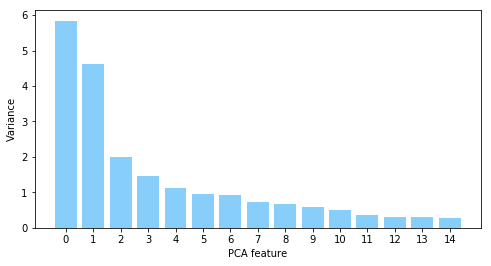

In [69]:
#check for optimal number of features
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

pca = PCA(random_state=123)
pca.fit(data_scaled)
features = range(pca.n_components_)


plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

fig. shows that the first three components explain the majority of the variance in our data. For this visualization use case, we will quickly plot just the first two. We do this to notice if there are any clear clusters.

Text(0, 0.5, 'PCA 2')

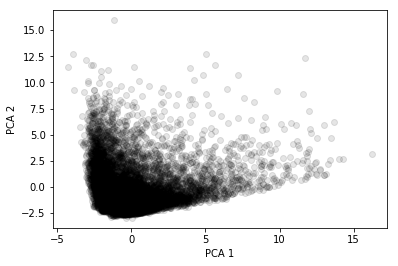

In [71]:
# Save components to a DataFrame
pca = PCA(random_state=123)
principle_components = pca.fit_transform(data_scaled)
PCA_components = pd.DataFrame(principle_components)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

**From above cum variace percentage value we can see that 70% of the variance is explained by first 4 PCA components.**

In [73]:
# So this time We will pass n_components=4 and use fit_transform to create 4 PCA components with the previous mean and variance 
# in each variables that had at the time of standardization.
pc_final=PCA(n_components=4).fit(data_scaled)

In [74]:
pc_final.explained_variance_

array([5.8402021 , 4.61431465, 1.98796559, 1.46379245])

In [76]:
reduced_cr=pc_final.fit_transform(data_scaled)  # the out put is Factors (F1, F2, ...F9)

In [77]:
dimensions = pd.DataFrame(reduced_cr)

In [78]:
dimensions.columns = ["C1", "C2", "C3", "C4"]  #

In [79]:
# Here we are getting reduced dimension matrix. But we want reduced variables matirx.
#Y = P1*PC1+P2*PC2+P3*PC3+P4*PC4+C2			
# comparing to the above equation we are getting P1, P2, P3 values for each PCA Components (here only 4 )
dimensions

,C1,C2,C3,C4
0,-1.617587,-1.826368,0.091391,0.567861
1,-2.009418,3.508599,1.689431,-0.421464
2,0.918874,-0.430743,-0.679500,1.500126
3,-0.446520,-0.446115,0.422452,1.883610
4,-1.768958,-0.993084,-0.926318,1.085635
5,0.401057,-0.124831,-2.516621,-0.397351
6,8.912209,0.311407,2.693294,2.099245
7,0.071012,-0.956095,-2.068224,-1.231417
8,-0.263369,-0.934409,-0.183449,0.754470
9,-0.060498,-1.071434,1.589887,1.876668


## Factor Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [80]:
# THese are the coefficient values(beta's) in each PCA equations.
# Also called as eigen vectors.
pc_final.components_

array([[ 0.03006995,  0.38496137,  0.32491654,  0.31156125, -0.08666388,
         0.15907214,  0.20262913,  0.03170968,  0.08198437,  0.30043914,
         0.2782455 ,  0.25240873, -0.12365559, -0.08514755,  0.34367634,
         0.13751493,  0.06979791,  0.38496137, -0.08666388, -0.08648416,
         0.08742516],
       [ 0.37817395,  0.07310347,  0.07918164,  0.02277667,  0.3908554 ,
         0.21327823,  0.25274249,  0.24125707,  0.15535063, -0.09149306,
         0.03077486, -0.08578262,  0.35377617,  0.33877686,  0.05108408,
        -0.15079469,  0.00871781,  0.07310347,  0.3908554 ,  0.24496033,
        -0.0152452 ],
       [-0.20037961,  0.02571005,  0.08589672, -0.07958707,  0.21133089,
         0.16353743,  0.25594946, -0.30672386, -0.37361756, -0.14030666,
         0.03258162, -0.17450858,  0.07938437,  0.12301047, -0.0747282 ,
         0.29463427, -0.11360124,  0.02571005,  0.21133089, -0.44519223,
         0.39171253],
       [ 0.08452952,  0.14797949,  0.36293678, -0.27490302

In [81]:
# Calculating Loading values
pc_final.components_.T * np.sqrt(pc_final.explained_variance_).T

array([[ 0.07266858,  0.81235379, -0.2825257 ,  0.10226998],
       [ 0.93031729,  0.15703324,  0.03624994,  0.17903637],
       [ 0.78520987,  0.17008973,  0.12111029,  0.43910738],
       [ 0.75293481,  0.04892647, -0.11221398, -0.33259772],
       [-0.20943635,  0.83959476,  0.29796647, -0.21992985],
       [ 0.38442185,  0.45814202,  0.23057998,  0.10569418],
       [ 0.48968389,  0.54291502,  0.36087654,  0.04230878],
       [ 0.07663123,  0.51824324, -0.43246602,  0.04538618],
       [ 0.19812762,  0.333708  , -0.52678294, -0.09307787],
       [ 0.72605655, -0.19653584, -0.19782571, -0.45819877],
       [ 0.67242227,  0.06610735,  0.04593853,  0.31296244],
       [ 0.60998381, -0.18426926, -0.24604878, -0.6598423 ],
       [-0.29883241,  0.75994504,  0.11192817, -0.16140984],
       [-0.20577192,  0.72772509,  0.1734389 , -0.235301  ],
       [ 0.83054577,  0.10973348, -0.1053632 , -0.06278741],
       [ 0.33232559, -0.32392142,  0.41542028, -0.28896947],
       [ 0.1686772 ,  0.

In [82]:
data_scaled.columns

Index(['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
       'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'PRC_FULL_PAYMENT', 'TENURE', 'Monthly_avg_purchase',
       'Monthly_avg_cashAdvance', 'Limit_usage', 'Pay_MinPay_ration'],
      dtype='object')

In [83]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=data_scaled.columns).T

In [84]:
Loadings
# Loadings.to_csv("Loadings.csv")

,0,1,2,3
BALANCE,0.072669,0.812354,-0.282526,0.102270
PURCHASES,0.930317,0.157033,0.036250,0.179036
ONEOFF_PURCHASES,0.785210,0.170090,0.121110,0.439107
INSTALLMENTS_PURCHASES,0.752935,0.048926,-0.112214,-0.332598
CASH_ADVANCE,-0.209436,0.839595,0.297966,-0.219930
CREDIT_LIMIT,0.384422,0.458142,0.230580,0.105694
PAYMENTS,0.489684,0.542915,0.360877,0.042309
MINIMUM_PAYMENTS,0.076631,0.518243,-0.432466,0.045386
BALANCE_FREQUENCY,0.198128,0.333708,-0.526783,-0.093078
PURCHASES_FREQUENCY,0.726057,-0.196536,-0.197826,-0.458199


# Applying t-SNE (t-distributed Stochastic Neighbor Embedding)

- t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

- It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.

https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/
https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [167]:
from sklearn.manifold import TSNE

In [169]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.376s...
[t-SNE] Computed neighbors for 8950 samples in 14.379s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.607802
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.198944
[t-SNE] KL divergence after 300 iterations: 2.543434


In [174]:
df_tsne = pd.DataFrame(tsne_results)
df_tsne.columns = ['tsne-2d-one','tsne-2d-two']

In [179]:
# df_tsne

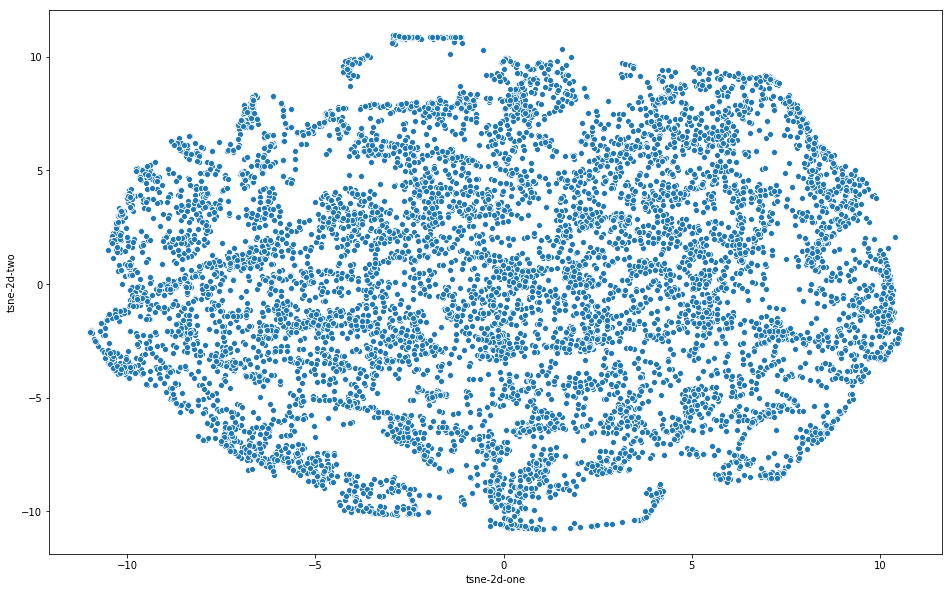

In [182]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                palette=sns.color_palette("hls", 4),
                data=df_tsne,
                legend="full"
                )

# Implementing K-Means Clustering

## Finding Optimal K value for clustering

In [54]:
from sklearn.cluster import KMeans

### Elbow method to find appropriate no. of clusters

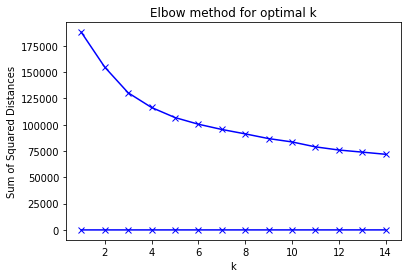

In [55]:
X = np.array(data_scaled)
sumOfSqrdDist = []
K = range(1,15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(X)
    sumOfSqrdDist.append([k, kmeans.inertia_])
    
plt.plot(K, sumOfSqrdDist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow method for optimal k')
plt.show();

###  Finding value of k after fitting PCA Components

In this step, we will use k-means clustering to view the top three PCA components. In order to do this, we will first fit these principal components to the k-means algorithm and determine the best number of clusters. Determining the ideal number of clusters for our k-means model can be done by measuring the sum of the squared distances to the nearest cluster center aka inertia. Much like the scree plot in fig. 1 for PCA, the k-means scree plot below indicates the percentage of variance explained, but in slightly different terms, as a function of the number of clusters.

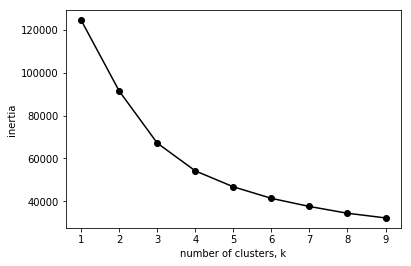

In [86]:
# Finding value of k after fitting PCA Components
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Segment Distribution to find K value

In [88]:
km_3=KMeans(n_clusters=3,random_state=123).fit(data_scaled)
km_4=KMeans(n_clusters=4,random_state=123).fit(data_scaled)
km_5=KMeans(n_clusters=5,random_state=123).fit(data_scaled)
km_6=KMeans(n_clusters=6,random_state=123).fit(data_scaled)

data_scaled2 = data_scaled
# save the cluster labels and sort by cluster
data_scaled2['cluster_3'] = km_3.labels_
data_scaled2['cluster_4'] = km_4.labels_
data_scaled2['cluster_5'] = km_5.labels_
data_scaled2['cluster_6'] = km_6.labels_


In [90]:
# check if all the clusters have count of 4% to 40% (just common rule to evaluate what k value is differtiating segments better)
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

1    0.512402
0    0.380223
2    0.107374
dtype: float64

In [92]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

1    0.381341
3    0.328939
0    0.183464
2    0.106257
dtype: float64

### Using Silhouette Coefficient (Another method to select K-value)

In [108]:
# calculate SC for K=3 through K=12
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(data_scaled)
    scores.append(metrics.silhouette_score(data_scaled, km.labels_))

In [109]:
scores

[0.26481038681181795,
 0.1773798820046856,
 0.1855135362484072,
 0.18998263438897942,
 0.19762886494890175,
 0.18641477771782305]

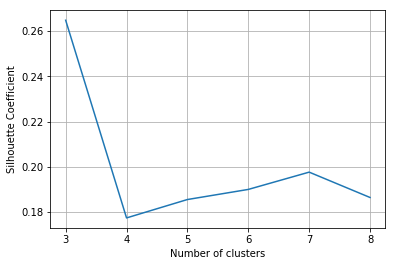

In [110]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

- Note

The solution can be between 3 and 4 based on the SC score(consider high).

### Profiling (Method to select k)

In [133]:
profile_data = pd.concat([data,data_scaled2.iloc[:,-4:]], axis=1)
profile_data.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_avg_cashAdvance,Limit_usage,Pay_MinPay_ration,cluster_3,cluster_4,cluster_5,cluster_6
0,40.900749,95.40,0.00,95.4,0.000000,1000.0,201.802084,139.509787,0.818182,0.166667,...,0.000000,12,7.950000,0.000000,0.040901,1.446508,1,0,4,3
1,3202.467416,0.00,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,0.909091,0.000000,...,0.222222,12,0.000000,536.912124,0.457495,3.826241,2,2,0,5
2,2495.148862,773.17,773.17,0.0,0.000000,7500.0,622.066742,627.284787,1.000000,1.000000,...,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,1,2,0
3,1666.670542,1499.00,1499.00,0.0,205.788017,7500.0,0.000000,767.303879,0.636364,0.083333,...,0.000000,12,124.916667,17.149001,0.222223,0.000000,1,0,4,3
4,817.714335,16.00,16.00,0.0,0.000000,1200.0,678.334763,244.791237,1.000000,0.083333,...,0.000000,12,1.333333,0.000000,0.681429,2.771075,1,3,3,2


In [134]:
profile_data.shape

(8950, 25)

In [135]:
profile_data.cluster_3.value_counts()/8950

1    0.512402
0    0.380223
2    0.107374
Name: cluster_3, dtype: float64

In [136]:
profile_data.cluster_3.value_counts()*100/sum(profile_data.cluster_3.value_counts())

1    51.240223
0    38.022346
2    10.737430
Name: cluster_3, dtype: float64

In [137]:
pd.Series.sort_index(profile_data.cluster_4.value_counts())

0    1642
1    3413
2     951
3    2944
Name: cluster_4, dtype: int64

In [138]:
size=pd.concat([pd.Series(profile_data.cluster_3.size), 
                pd.Series.sort_index(profile_data.cluster_3.value_counts()),
                pd.Series.sort_index(profile_data.cluster_4.value_counts()),
                pd.Series.sort_index(profile_data.cluster_5.value_counts()), 
                pd.Series.sort_index(profile_data.cluster_6.value_counts()),
                ])

In [139]:
size

0    8950
0    3403
1    4586
2     961
0    1642
1    3413
2     951
3    2944
0     925
1     659
2    2761
3    2960
4    1645
0    1230
1    1872
2    2891
3    1639
4     393
5     925
dtype: int64

In [140]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/profile_data.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5
Seg_size,8950,3403,4586,961,1642,3413,951,2944,925,659,2761,2960,1645,1230,1872,2891,1639,393,925


In [141]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5
Seg_Pct,1.0,0.380223,0.512402,0.107374,0.183464,0.381341,0.106257,0.328939,0.103352,0.073631,0.308492,0.330726,0.183799,0.13743,0.209162,0.323017,0.183128,0.043911,0.103352


In [142]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5
Seg_size,8950.0,3403.000000,4586.000000,961.000000,1642.000000,3413.000000,951.000000,2944.000000,925.000000,659.000000,2761.000000,2960.000000,1645.000000,1230.00000,1872.000000,2891.000000,1639.000000,393.000000,925.000000
Seg_Pct,1.0,0.380223,0.512402,0.107374,0.183464,0.381341,0.106257,0.328939,0.103352,0.073631,0.308492,0.330726,0.183799,0.13743,0.209162,0.323017,0.183128,0.043911,0.103352


In [145]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([profile_data.apply(lambda x: x.mean()).T, profile_data.groupby('cluster_3').apply(lambda x: x.mean()).T, 
                             profile_data.groupby('cluster_4').apply(lambda x: x.mean()).T,
                             profile_data.groupby('cluster_5').apply(lambda x: x.mean()).T, 
                             profile_data.groupby('cluster_6').apply(lambda x: x.mean()).T], axis=1)


In [146]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5
BALANCE,1541.046707,1178.868558,1137.245464,4750.541751,143.692198,1169.484195,4781.630357,1704.363250,4766.007343,2802.126040,812.719837,1708.111692,144.243218,1320.185138,703.734354,1697.606882,141.585669,3314.891591,4766.007343
PURCHASES,936.229237,1906.657617,271.229625,673.295255,336.824805,1903.187829,672.240599,234.818094,529.727341,5268.786206,1135.889815,243.713000,340.146815,2101.135366,848.842399,219.789716,333.014783,6449.366692,529.727341
ONEOFF_PURCHASES,536.493774,1042.318679,190.073683,398.471285,197.417010,1039.805776,399.148901,186.485336,316.281395,3386.510756,496.426559,194.441787,201.317313,1518.532301,134.100021,171.156071,195.288347,4008.496738,316.281395
INSTALLMENTS_PURCHASES,384.498368,826.870920,81.456027,264.163697,139.771255,826.023815,262.319330,48.597497,213.517503,1672.893191,639.524296,49.534520,139.192298,582.642902,714.677175,48.903238,138.090561,2090.383136,213.517503
CASH_ADVANCE,935.920972,203.776759,627.847866,4998.678538,327.666113,202.342230,5012.275909,808.830340,5016.451712,548.310615,158.227141,809.413190,329.610939,249.550003,149.978096,814.862361,329.194467,644.408526,5016.451712
CREDIT_LIMIT,4474.254540,5010.196143,3320.382929,8082.835115,3537.764582,5017.740250,8099.689322,3195.386096,8076.437346,8624.279211,4180.296079,3218.924550,3538.394799,6080.617147,3461.372000,3178.023752,3535.698258,9242.620865,8076.437346
PAYMENTS,1649.420364,1961.124293,933.226516,3963.402169,929.817219,1957.517844,3977.311397,941.617135,3863.769594,5207.526347,1234.213784,949.714342,934.800493,2077.451735,1001.929809,933.990870,932.758787,6433.811423,3863.769594
MINIMUM_PAYMENTS,767.303879,671.639269,617.814854,1819.440542,238.537230,665.500141,1830.467194,836.808866,1775.610776,1268.081702,550.569411,837.000270,238.067456,495.685664,622.852217,834.489531,238.110564,1644.998935,1775.610776
BALANCE_FREQUENCY,0.877271,0.964604,0.795318,0.959103,0.469667,0.964466,0.960927,0.976500,0.960914,0.981793,0.960766,0.976375,0.469898,0.971083,0.957024,0.976132,0.468682,0.983662,0.960914
PURCHASES_FREQUENCY,0.490351,0.890556,0.228444,0.323031,0.326356,0.888711,0.324315,0.173630,0.308971,0.935898,0.880161,0.175295,0.326495,0.875747,0.880859,0.164072,0.325184,0.939925,0.308971


In [147]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [148]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5
Seg_size,8950.000000,3403.000000,4586.000000,961.000000,1642.000000,3413.000000,951.000000,2944.000000,925.000000,659.000000,2761.000000,2960.000000,1645.000000,1230.000000,1872.000000,2891.000000,1639.000000,393.000000,925.000000
Seg_Pct,1.000000,0.380223,0.512402,0.107374,0.183464,0.381341,0.106257,0.328939,0.103352,0.073631,0.308492,0.330726,0.183799,0.137430,0.209162,0.323017,0.183128,0.043911,0.103352
BALANCE,1541.046707,1178.868558,1137.245464,4750.541751,143.692198,1169.484195,4781.630357,1704.363250,4766.007343,2802.126040,812.719837,1708.111692,144.243218,1320.185138,703.734354,1697.606882,141.585669,3314.891591,4766.007343
PURCHASES,936.229237,1906.657617,271.229625,673.295255,336.824805,1903.187829,672.240599,234.818094,529.727341,5268.786206,1135.889815,243.713000,340.146815,2101.135366,848.842399,219.789716,333.014783,6449.366692,529.727341
ONEOFF_PURCHASES,536.493774,1042.318679,190.073683,398.471285,197.417010,1039.805776,399.148901,186.485336,316.281395,3386.510756,496.426559,194.441787,201.317313,1518.532301,134.100021,171.156071,195.288347,4008.496738,316.281395
INSTALLMENTS_PURCHASES,384.498368,826.870920,81.456027,264.163697,139.771255,826.023815,262.319330,48.597497,213.517503,1672.893191,639.524296,49.534520,139.192298,582.642902,714.677175,48.903238,138.090561,2090.383136,213.517503
CASH_ADVANCE,935.920972,203.776759,627.847866,4998.678538,327.666113,202.342230,5012.275909,808.830340,5016.451712,548.310615,158.227141,809.413190,329.610939,249.550003,149.978096,814.862361,329.194467,644.408526,5016.451712
CREDIT_LIMIT,4474.254540,5010.196143,3320.382929,8082.835115,3537.764582,5017.740250,8099.689322,3195.386096,8076.437346,8624.279211,4180.296079,3218.924550,3538.394799,6080.617147,3461.372000,3178.023752,3535.698258,9242.620865,8076.437346
PAYMENTS,1649.420364,1961.124293,933.226516,3963.402169,929.817219,1957.517844,3977.311397,941.617135,3863.769594,5207.526347,1234.213784,949.714342,934.800493,2077.451735,1001.929809,933.990870,932.758787,6433.811423,3863.769594
MINIMUM_PAYMENTS,767.303879,671.639269,617.814854,1819.440542,238.537230,665.500141,1830.467194,836.808866,1775.610776,1268.081702,550.569411,837.000270,238.067456,495.685664,622.852217,834.489531,238.110564,1644.998935,1775.610776


In [149]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6'
                                ]

In [150]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5,KM6_1,KM6_2,KM6_3,KM6_4,KM6_5,KM6_6
Seg_size,8950.000000,3403.000000,4586.000000,961.000000,1642.000000,3413.000000,951.000000,2944.000000,925.000000,659.000000,2761.000000,2960.000000,1645.000000,1230.000000,1872.000000,2891.000000,1639.000000,393.000000,925.000000
Seg_Pct,1.000000,0.380223,0.512402,0.107374,0.183464,0.381341,0.106257,0.328939,0.103352,0.073631,0.308492,0.330726,0.183799,0.137430,0.209162,0.323017,0.183128,0.043911,0.103352
BALANCE,1541.046707,1178.868558,1137.245464,4750.541751,143.692198,1169.484195,4781.630357,1704.363250,4766.007343,2802.126040,812.719837,1708.111692,144.243218,1320.185138,703.734354,1697.606882,141.585669,3314.891591,4766.007343
PURCHASES,936.229237,1906.657617,271.229625,673.295255,336.824805,1903.187829,672.240599,234.818094,529.727341,5268.786206,1135.889815,243.713000,340.146815,2101.135366,848.842399,219.789716,333.014783,6449.366692,529.727341
ONEOFF_PURCHASES,536.493774,1042.318679,190.073683,398.471285,197.417010,1039.805776,399.148901,186.485336,316.281395,3386.510756,496.426559,194.441787,201.317313,1518.532301,134.100021,171.156071,195.288347,4008.496738,316.281395
INSTALLMENTS_PURCHASES,384.498368,826.870920,81.456027,264.163697,139.771255,826.023815,262.319330,48.597497,213.517503,1672.893191,639.524296,49.534520,139.192298,582.642902,714.677175,48.903238,138.090561,2090.383136,213.517503
CASH_ADVANCE,935.920972,203.776759,627.847866,4998.678538,327.666113,202.342230,5012.275909,808.830340,5016.451712,548.310615,158.227141,809.413190,329.610939,249.550003,149.978096,814.862361,329.194467,644.408526,5016.451712
CREDIT_LIMIT,4474.254540,5010.196143,3320.382929,8082.835115,3537.764582,5017.740250,8099.689322,3195.386096,8076.437346,8624.279211,4180.296079,3218.924550,3538.394799,6080.617147,3461.372000,3178.023752,3535.698258,9242.620865,8076.437346
PAYMENTS,1649.420364,1961.124293,933.226516,3963.402169,929.817219,1957.517844,3977.311397,941.617135,3863.769594,5207.526347,1234.213784,949.714342,934.800493,2077.451735,1001.929809,933.990870,932.758787,6433.811423,3863.769594
MINIMUM_PAYMENTS,767.303879,671.639269,617.814854,1819.440542,238.537230,665.500141,1830.467194,836.808866,1775.610776,1268.081702,550.569411,837.000270,238.067456,495.685664,622.852217,834.489531,238.110564,1644.998935,1775.610776


In [151]:
Profling_output_final.to_csv('Profiling_output.csv')

## Finalize the K-means Clustering Model

In [ ]:
# Finally valuse of no. of clusters(k) is selected as 4

In [156]:
X = np.array(data_scaled)
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

# data_scaled = data_scaled.as_matrix(columns=None)

In [157]:
y_kmeans

array([0, 1, 2, ..., 2, 0, 0])

In [158]:
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

[[-0.22468693 -0.45705419 -0.31402136 -0.49859842 -0.19504125 -0.35968605
  -0.32483565 -0.13185593 -0.29817502 -0.81877055 -0.38917782 -0.73183388
  -0.03249203 -0.12555315 -0.47876205 -0.33124654 -0.05367485 -0.45705419
  -0.19504125  0.14912949 -0.07963644]
 [ 1.4749256  -0.29671044 -0.21802355 -0.29287462  1.96545083  0.85211922
   0.77005479  0.74314333  0.34925823 -0.48475079 -0.21577491 -0.43223956
   1.64785775  1.55757781 -0.27866779 -0.39383075 -0.09771211 -0.29671044
   1.96545083  0.65890141 -0.03835562]
 [-0.40360709  0.07015287 -0.07547495  0.30366595 -0.44278021 -0.1232415
  -0.22165261 -0.19769738  0.13322986  0.91295845  0.18835208  0.82419758
  -0.49788024 -0.38041318  0.20247077  0.43558654  0.03602087  0.07015287
  -0.44278021 -0.38751964  0.00466233]
 [ 0.64313485  2.84289686  2.59076836  1.92177906 -0.21966389  1.16291088
   1.59541225  0.40435563  0.44311671  1.1125719   1.71776062  0.95210136
  -0.31863548 -0.19654145  2.2816952   0.47883665  0.30973128  2.84289

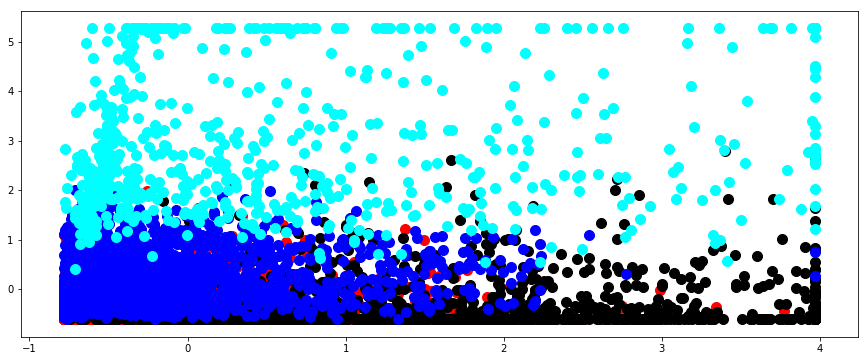

In [161]:
plt.figure(figsize=(15,6))
plt.scatter(X[y_kmeans ==0,0], X[y_kmeans == 0,1], s=100, c='red')
plt.scatter(X[y_kmeans ==1,0], X[y_kmeans == 1,1], s=100, c='black')
plt.scatter(X[y_kmeans ==2,0], X[y_kmeans == 2,1], s=100, c='blue')
plt.scatter(X[y_kmeans ==3,0], X[y_kmeans == 3,1], s=100, c='cyan')

## Implementation of k-means usine t-sne data

In [183]:
X = np.array(df_tsne)
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

# data_scaled = data_scaled.as_matrix(columns=None)

In [184]:
y_kmeans

array([1, 0, 3, ..., 1, 0, 0])

In [185]:
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

[[-5.5237646 -3.2453346]
 [ 3.7709224 -5.090903 ]
 [-3.5883815  5.3427854]
 [ 5.4732823  3.6180263]]


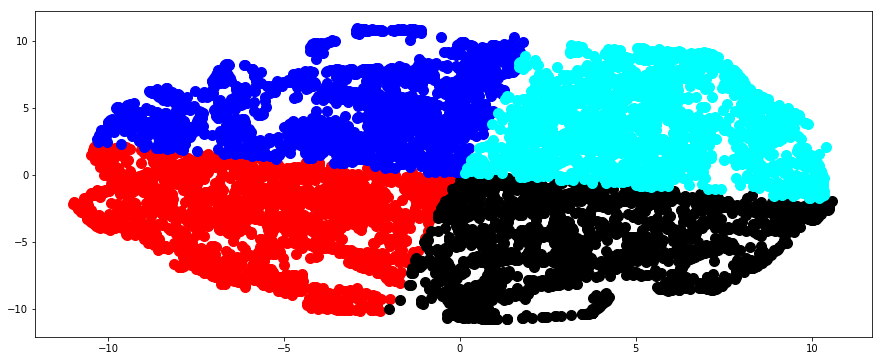

In [186]:
plt.figure(figsize=(15,6))
plt.scatter(X[y_kmeans ==0,0], X[y_kmeans == 0,1], s=100, c='red')
plt.scatter(X[y_kmeans ==1,0], X[y_kmeans == 1,1], s=100, c='black')
plt.scatter(X[y_kmeans ==2,0], X[y_kmeans == 2,1], s=100, c='blue')
plt.scatter(X[y_kmeans ==3,0], X[y_kmeans == 3,1], s=100, c='cyan')

## Implementation of k-means usine PCA data

In [187]:
X = np.array(dimensions)
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

# data_scaled = data_scaled.as_matrix(columns=None)

In [188]:
y_kmeans

array([0, 2, 3, ..., 3, 0, 0])

In [189]:
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

[[-1.42871552 -0.42825322 -0.02464965  0.69125894]
 [ 6.07064993  1.18096556  0.22088131  0.91902313]
 [-1.24010394  4.01667166  0.58202683 -0.56921424]
 [ 0.90015905 -1.26606108 -0.24214417 -0.86636507]]


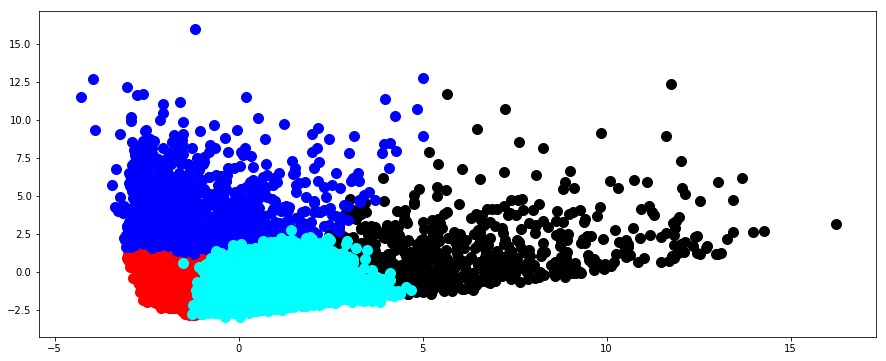

In [190]:
plt.figure(figsize=(15,6))
plt.scatter(X[y_kmeans ==0,0], X[y_kmeans == 0,1], s=100, c='red')
plt.scatter(X[y_kmeans ==1,0], X[y_kmeans == 1,1], s=100, c='black')
plt.scatter(X[y_kmeans ==2,0], X[y_kmeans == 2,1], s=100, c='blue')
plt.scatter(X[y_kmeans ==3,0], X[y_kmeans == 3,1], s=100, c='cyan')

- K-means is the most frequently used form of clustering due to its speed and simplicity. Another very common clustering method is hierarchical clustering.
    

# Implementing Agglomerative Hierarchical Clustering

Agglomerative hierarchical clustering differs from k-means in a key way. Rather than choosing a number of clusters and starting out with random centroids, we instead begin with every point in our dataset as a “cluster.” Then we find the two closest points and combine them into a cluster. Then, we find the next closest points, and those become a cluster. We repeat the process until we only have one big giant cluster.
Along the way, we create what’s called a dendrogram. This is our “history.” 
https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097
The dendrogram plots out each cluster and the distance. We can use the dendrogram to find the clusters for any number we chose. In the dendrogram above, it’s easy to see the starting points for the first cluster (blue), the second cluster (red), and the third cluster (green). Only the first 3 are color-coded here, but if you look over at the red side of the dendrogram, you can spot the starting point for the 4th cluster as well. The dendrogram runs all the way until every point is its own individual cluster.
Let’s see how agglomerative hierarchical clustering works in Python. First, let’s import the necessary libraries from scipy.cluster.hierarchy and sklearn.clustering.


In [163]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Now, let’s create our dendrogram (which I’ve already shown you above), determine how many clusters we want, and save the data points from those clusters to chart them out.

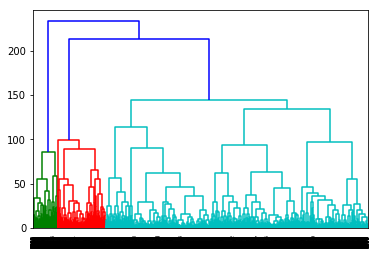

In [164]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

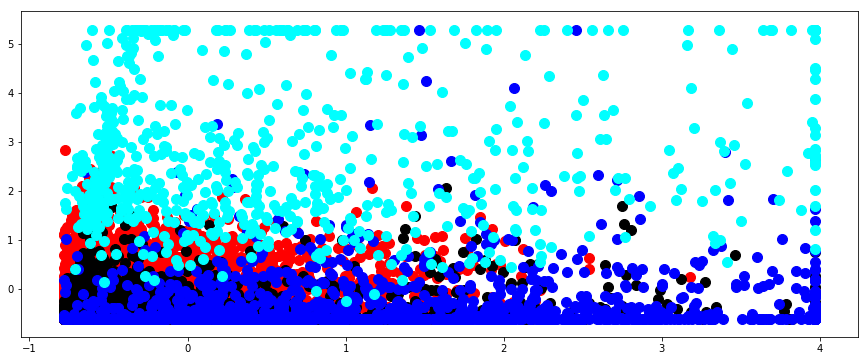

In [166]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X)

#Now, we’ll do as we did with the k-means algorithm and see our clusters using matplotlib.
plt.figure(figsize=(15,6))
plt.scatter(X[y_hc ==0,0], X[y_hc == 0,1], s=100, c='red')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=100, c='black')
plt.scatter(X[y_hc ==2,0], X[y_hc == 2,1], s=100, c='blue')
plt.scatter(X[y_hc ==3,0], X[y_hc == 3,1], s=100, c='cyan')